<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/02.%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94/%ED%95%B4%EC%84%A4/ch02_08_Seaborn%EC%8B%A4%EC%8A%B5_Iris%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.08. Seborn 실습 - 아이리스 데이터


---

* 날짜:
* 이름:


## 학습내용

    - distplot을 이용해 데이터 분포를 시각화 한다.
    - jointplot을 이용해 두 변수의 분포를 시각화 한다.


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2', )
```


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2', )


## **실습**
---



### (1) 데이터 기본 탐색


#### | 데이터 준비

```
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
print(x_names)
y_names = iris.target_names
print(y_names)

xs = iris.data
print('x',xs.shape)
y = iris.target
print('y',y.shape)
```

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
print(x_names)
y_names = iris.target_names
print(y_names)

xs = iris.data
print('x',xs.shape)
y = iris.target
print('y',y.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
x (150, 4)
y (150,)


In [ ]:
iris = pd.DataFrame(xs)
iris.columns=x_names
iris['label']=[y_names[i] for i in y]
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
sepal_size = np.array(iris.iloc[:,0]+iris.iloc[:,1]>8.8, dtype='int8')
iris['sepal_size']=[['small','big'][i] for i in sepal_size]
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,sepal_size
0,5.1,3.5,1.4,0.2,setosa,small
1,4.9,3.0,1.4,0.2,setosa,small
2,4.7,3.2,1.3,0.2,setosa,small
3,4.6,3.1,1.5,0.2,setosa,small
4,5.0,3.6,1.4,0.2,setosa,small


#### | 데이터 기본 탐색


In [ ]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    object 
 5   sepal_size         150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


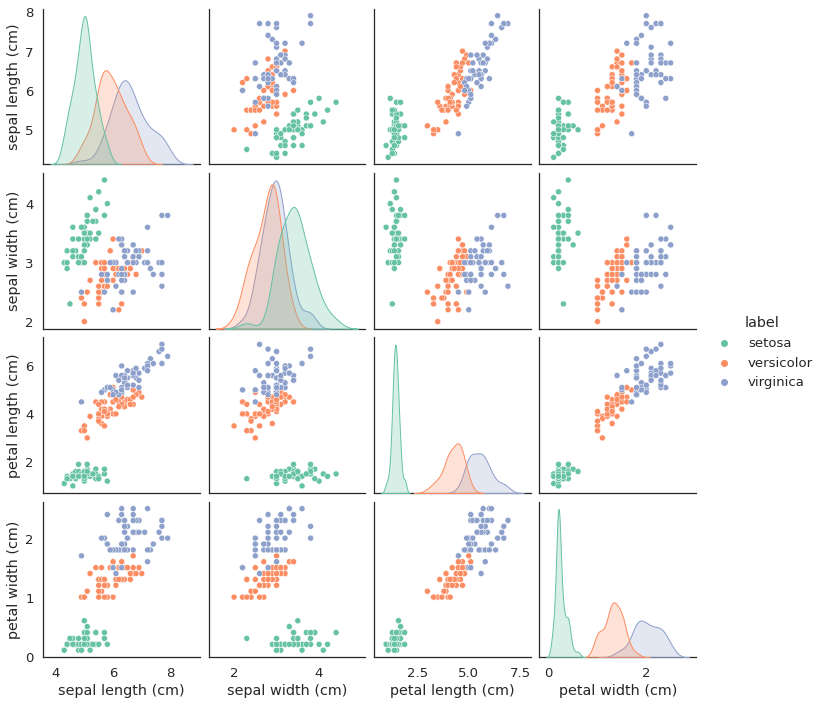

In [ ]:
sns.pairplot(iris, hue='label') 

### (2) Distributions plot

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.displot(data=None, x=None, y=None, 
                hue=None, hue_order=None, hue_norm=None, 
                row=None, col=None, 
                row_order=None, col_order=None,
                weights=None,
                kind='hist', # {“hist”, “kde”, “ecdf”}
                rug=False, rug_kws=None, 
                log_scale=None, 
                legend=True, 
                palette=None, color=None, col_wrap=None,  
                height=5, aspect=1)

```

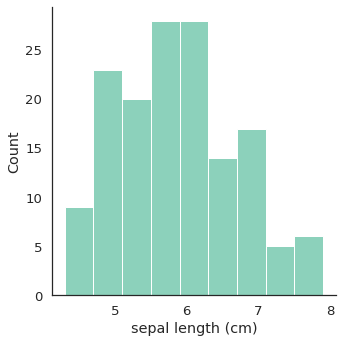

In [ ]:
sns.displot(data=iris, x=x_names[0])

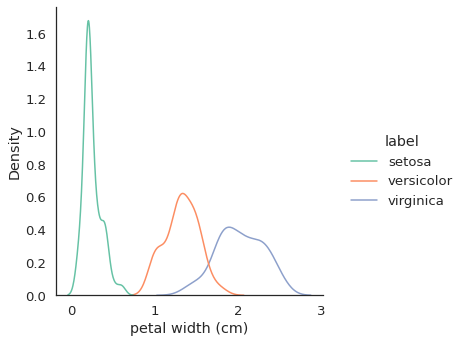

In [ ]:
sns.displot(data=iris, x=x_names[3], hue='label', kind='kde')

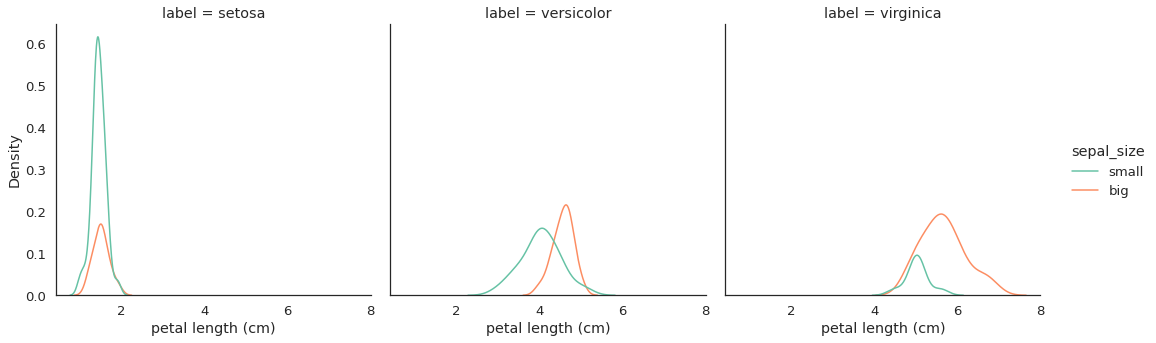

In [ ]:
sns.displot(data=iris, x=x_names[2], hue='sepal_size', col='label', kind='kde')

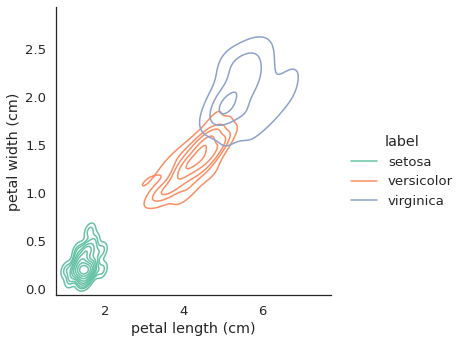

In [ ]:
sns.displot(data=iris, x=x_names[2], y=x_names[3], hue='label', kind='kde')

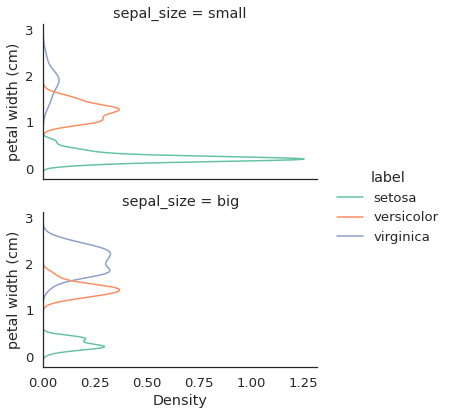

In [ ]:
g = sns.displot(data=iris, y=x_names[3], hue='label', row='sepal_size',  kind='kde', 
            height=3, aspect=1.6)

### (3) Joint plot


```
seaborn.jointplot(x=None, y=None, data=None, 
                  hue=None,
                  hue_order=None,
                  color=None, 
                  palette=None,
                  kind='scatter', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }
                  height=6, ratio=5, space=0.2, 
                  xlim=None, ylim=None, 
                  marginal_ticks=False)
```

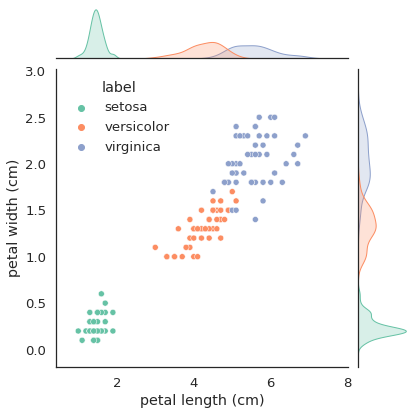

In [ ]:
sns.jointplot(data=iris, x=x_names[2], y=x_names[3], hue='label')

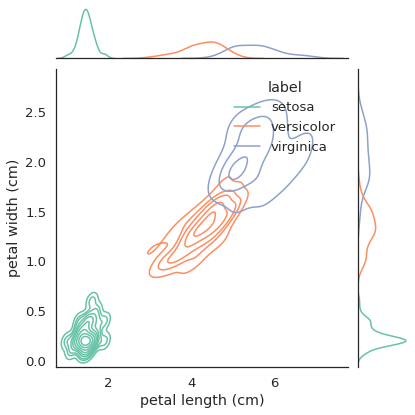

In [ ]:
sns.jointplot(data=iris, x=x_names[2], y=x_names[3], hue='label',
              kind='kde')

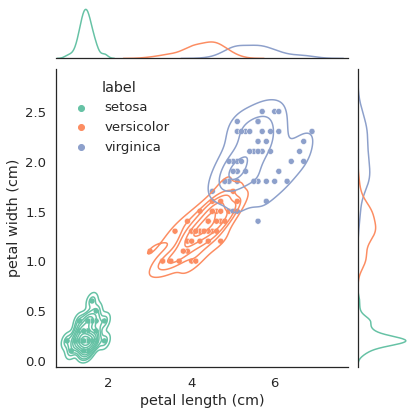

In [ ]:
g = sns.jointplot(data=iris, x=x_names[2], y=x_names[3], hue='label', kind='kde')
g.plot_joint(sns.scatterplot)


## **과제: [penguin dataset : The new Iris](https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/notebook)**

---

![](https://imgur.com/orZWHly.png)



### (1) 데이터 기본 탐색


#### | 데이터 준비

```
df = sns.load_dataset('penguins')
```

#### | 데이터 기본 탐색


### (2) Distributions plot


### (3) Joint plot
